In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

os.getcwd()


'd:\\git_local_repository\\yangoos57\\ML\\Hands_On_Data_preprocessing_in_python\\Part2'

### Clustering analysis 
### K-means


In [22]:
report_df = pd.read_csv('./data/ch8/WH Report_preprocessed.csv ')

report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              1220 non-null   object 
 1   Continent                         1220 non-null   object 
 2   year                              1220 non-null   int64  
 3   population                        1220 non-null   float64
 4   Life_Ladder                       1220 non-null   float64
 5   Log_GDP_per_capita                1220 non-null   float64
 6   Social_support                    1220 non-null   float64
 7   Healthy_life_expectancy_at_birth  1220 non-null   float64
 8   Freedom_to_make_life_choices      1220 non-null   float64
 9   Generosity                        1220 non-null   float64
 10  Perceptions_of_corruption         1220 non-null   float64
 11  Positive_affect                   1220 non-null   float64
 12  Negati

In [18]:
BM = report_df.year == 2019
report_2019 = report_df[BM]
# report_2019.info()

### iterrows : row를 순차적으로 꺼내는 method

### annotate : Text와 유사한 기능임.
* plt.text(x, y, 'hello', family='consolas', fontsize=10)
* ax.annotate(label, xy=좌표, xytext=텍스트좌표, arrowprops=, horizontalaligment=,verticalalignment=)


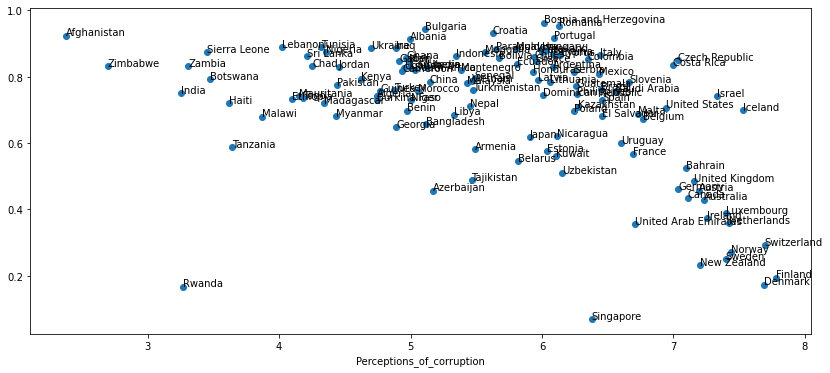

In [16]:
plt.figure(figsize=(14,6))
plt.scatter(report_2019.Life_Ladder, report_2019.Perceptions_of_corruption)

for _, row in report_2019.iterrows() :
    plt.annotate(row.Name, (row.Life_Ladder, row.Perceptions_of_corruption))

plt.xlabel('Life_Ladder')
plt.xlabel('Perceptions_of_corruption')
plt.show()


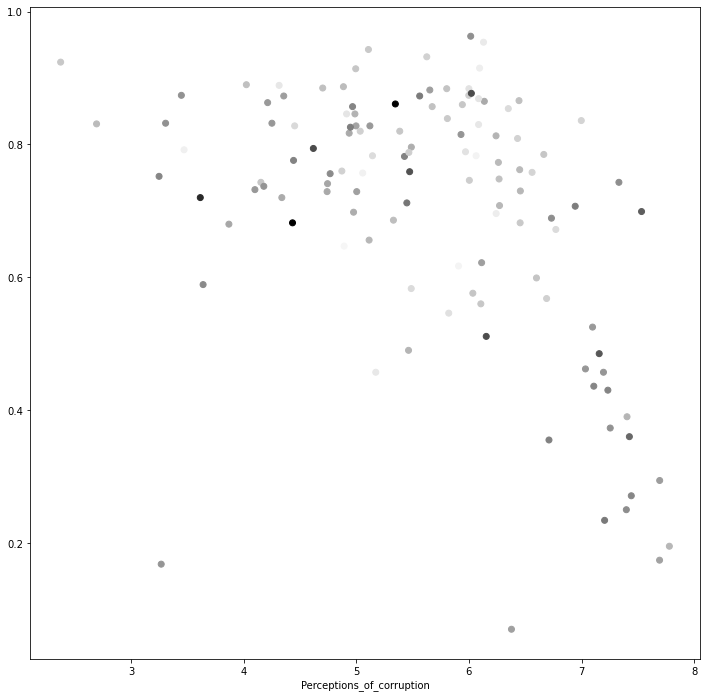

In [17]:
plt.figure(figsize=(12,12))
plt.scatter(report_2019.Life_Ladder, report_2019.Perceptions_of_corruption, c=report_2019.Generosity, cmap='binary')
plt.xlabel('Life_Ladder')
plt.xlabel('Perceptions_of_corruption')
plt.show()



* Random-based means that the output of the algorithm on the same data may be different on every run.
* Heuristic means that the algorithm does not rach the optimal solution.

In [31]:
from sklearn.cluster import KMeans

dimensions = ['Life_Ladder',"Perceptions_of_corruption"]
xs = report_2019[dimensions]
kmeans = KMeans(n_clusters= 6)
kmeans.fit(xs)

KMeans(n_clusters=6)


In [33]:
for i in range(6) :
    BM =kmeans.labels_ == i
    print('Cluster {} : {}' .format(i+1,report_2019[BM].Name.values))

Cluster 1 : ['Argentina' 'Belarus' 'Bolivia' 'Bosnia and Herzegovina' 'Chile'
 'Colombia' 'Croatia' 'Cyprus' 'Dominican Republic' 'Ecuador' 'Estonia'
 'Greece' 'Guatemala' 'Honduras' 'Hungary' 'Japan' 'Kazakhstan' 'Kuwait'
 'Latvia' 'Lithuania' 'Moldova' 'Mongolia' 'Nicaragua' 'Panama' 'Paraguay'
 'Peru' 'Philippines' 'Poland' 'Portugal' 'Romania' 'Serbia' 'Thailand'
 'Uzbekistan']
Cluster 2 : ['Chad' 'Ethiopia' 'Jordan' 'Kenya' 'Lebanon' 'Madagascar' 'Malawi'
 'Mauritania' 'Myanmar' 'Nigeria' 'Pakistan' 'Sri Lanka' 'Togo' 'Tunisia']
Cluster 3 : ['Belgium' 'Brazil' 'Costa Rica' 'Czech Republic' 'El Salvador' 'France'
 'Italy' 'Malta' 'Mexico' 'Saudi Arabia' 'Singapore' 'Slovenia' 'Spain'
 'United Arab Emirates' 'United States' 'Uruguay']
Cluster 4 : ['Albania' 'Algeria' 'Armenia' 'Azerbaijan' 'Bangladesh' 'Benin'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'China' 'Gabon' 'Georgia'
 'Ghana' 'Guinea' 'Indonesia' 'Iraq' 'Liberia' 'Libya' 'Malaysia' 'Mali'
 'Montenegro' 'Morocco' 'Ne

### pandas 모든 Value 가지고 오기
### Pandas.values

* values는 row를 list 형식으로 불러온다.
* iloc는 row를 Series 형식으로 가지고 온다.

In [29]:
report_2019.iloc[1,:]

Name                                    Albania
Continent                                Europe
year                                       2019
population                          2.85419e+06
Life_Ladder                               4.995
Log_GDP_per_capita                        9.544
Social_support                            0.686
Healthy_life_expectancy_at_birth             69
Freedom_to_make_life_choices              0.777
Generosity                               -0.099
Perceptions_of_corruption                 0.914
Positive_affect                           0.681
Negative_affect                           0.274
Name: 19, dtype: object

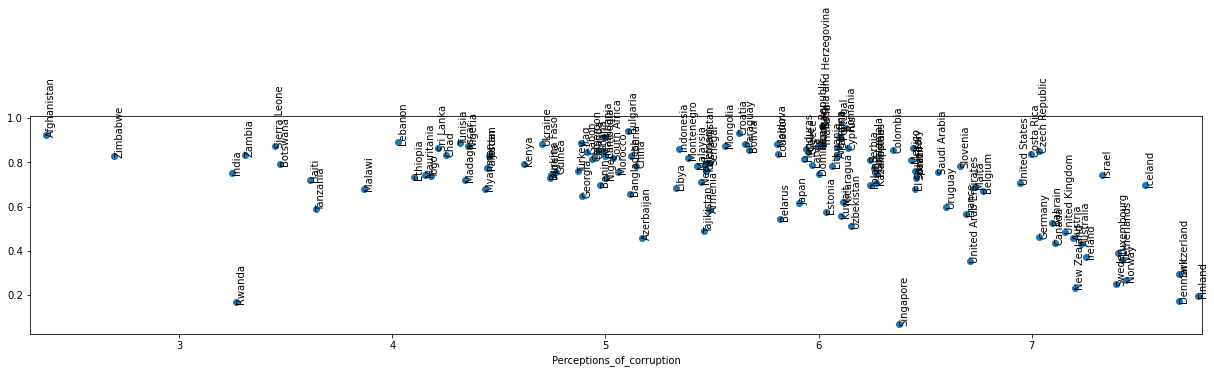

In [32]:
plt.figure(figsize=(21,4))
plt.scatter(report_2019.Life_Ladder, report_2019.Perceptions_of_corruption)

for _, row in report_2019.iterrows() :
    plt.annotate(row.Name, (row.Life_Ladder, row.Perceptions_of_corruption), rotation =90)
plt.xlim([2.3,7.8])
plt.xlabel('Life_Ladder')
plt.xlabel('Perceptions_of_corruption')
plt.show()


In [70]:
from sklearn.cluster import KMeans

dimensions = ['Life_Ladder',"Perceptions_of_corruption"]
xs = report_2019[dimensions]
xs_norm = (xs-xs.min()) / (xs.max() - xs.min())
kmeans = KMeans(n_clusters= 6)
kmeans.fit(xs)

KMeans(n_clusters=6)

In [37]:
for i in range(6) :
    BM =kmeans.labels_ == i
    print('Cluster {} : {}' .format(i+1,report_2019[BM].Name.values))

Cluster 1 : ['Afghanistan' 'Botswana' 'Haiti' 'India' 'Rwanda' 'Sierra Leone'
 'Tanzania' 'Zambia' 'Zimbabwe']
Cluster 2 : ['Argentina' 'Belarus' 'Bolivia' 'Bosnia and Herzegovina' 'Chile'
 'Colombia' 'Croatia' 'Cyprus' 'Dominican Republic' 'Ecuador' 'Estonia'
 'Greece' 'Guatemala' 'Honduras' 'Hungary' 'Japan' 'Kazakhstan' 'Kuwait'
 'Latvia' 'Lithuania' 'Moldova' 'Nicaragua' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Serbia' 'Thailand'
 'Uzbekistan']
Cluster 3 : ['Albania' 'Algeria' 'Armenia' 'Azerbaijan' 'Bangladesh' 'Benin'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'China' 'Gabon' 'Georgia'
 'Ghana' 'Guinea' 'Indonesia' 'Iraq' 'Liberia' 'Libya' 'Malaysia' 'Mali'
 'Mongolia' 'Montenegro' 'Morocco' 'Nepal' 'Niger' 'Senegal'
 'South Africa' 'Tajikistan' 'Turkey' 'Turkmenistan' 'Uganda' 'Ukraine'
 'Vietnam']
Cluster 4 : ['Australia' 'Austria' 'Bahrain' 'Canada' 'Denmark' 'Finland' 'Germany'
 'Iceland' 'Ireland' 'Israel' 'Luxembourg' 'Netherlands' 'New

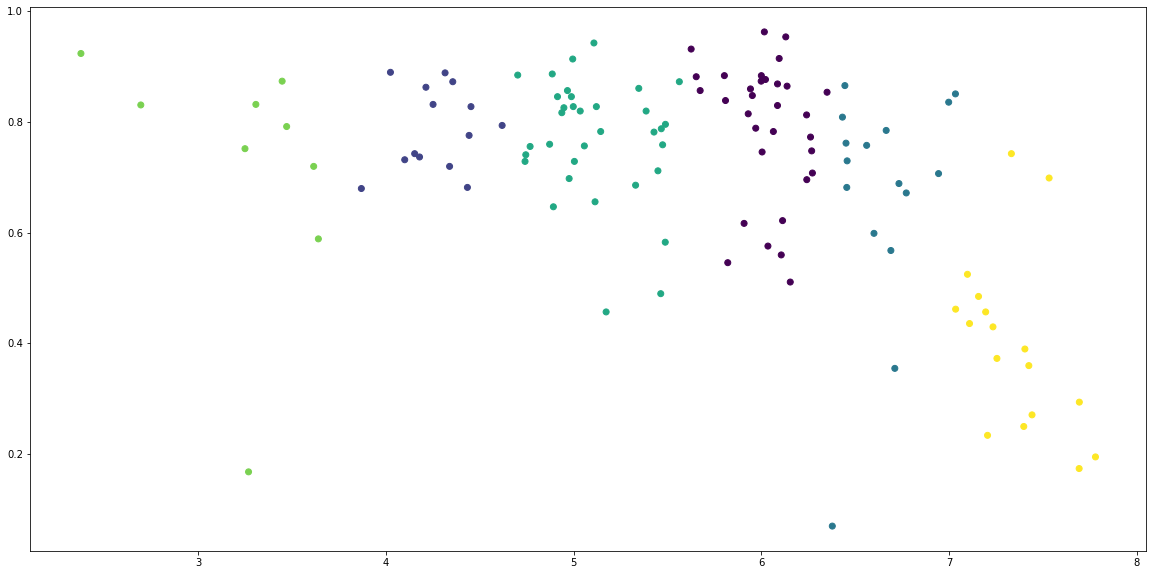

In [71]:
### 국가별로 cluster를 붙이고 싶다. 어떻게 해야할까

# 1. cluster 별 리스트를 불러온다.
# 2. 리스트 내 요소를 하나씩 뽑은 뒤 새로운 열을 넣는 방식으로 하나씩 주입한다. 이때 column 명은 cluster

report_2019['cluster'] = kmeans.labels_

# 3. cluster 명을 label로 해서 색을 한 번 칠해보고 annotate도 해보자.
plt.figure(figsize=(20,10))
plt.scatter(report_2019.Life_Ladder, report_2019.Perceptions_of_corruption, c = report_2019['cluster'], cmap='viridis')


# for _, row in report_2019.iterrows() :
#     plt.annotate(row.Name, (row.Life_Ladder, row.Perceptions_of_corruption))


### Remove()는 요소이름, del()은 위치로 지운다.
### pop()은 list 요소를 하나 꺼내서 반환한다.

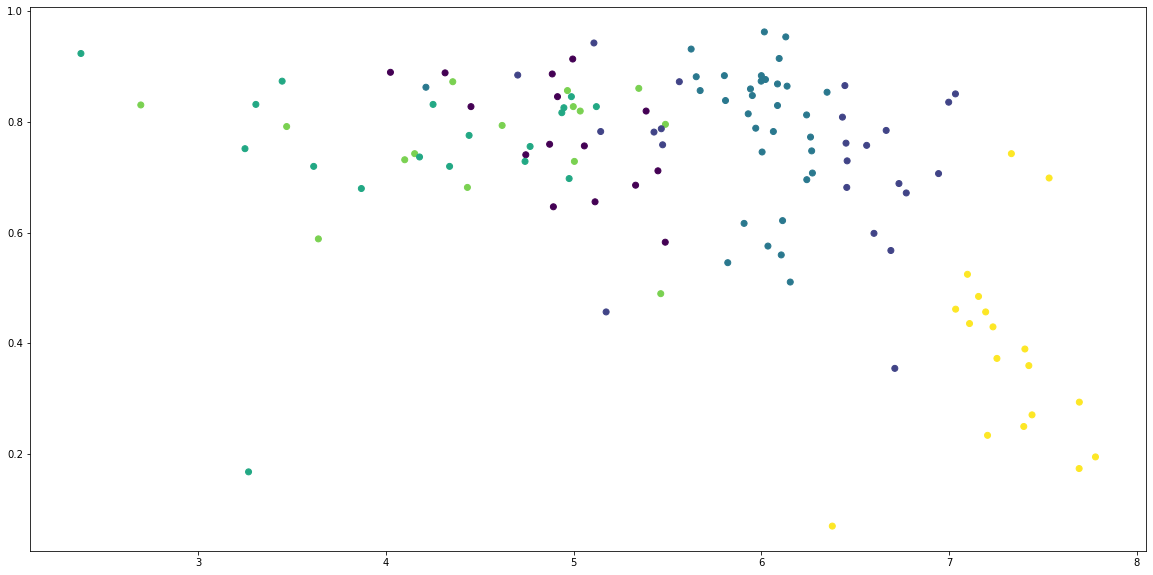

In [75]:
dimensions = report_2019.columns.to_list()
[dimensions.remove(i) for i in ['Name','year','Continent','population']]

xs = report_2019[dimensions]
xs = (xs -xs.min())/(xs.max() - xs.min())
kmeans = KMeans(n_clusters= 6)
kmeans.fit(xs)

report_2019['cluster'] = kmeans.labels_

# 3. cluster 명을 label로 해서 색을 한 번 칠해보고 annotate도 해보자.
plt.figure(figsize=(20,10))
plt.scatter(report_2019.Life_Ladder, report_2019.Perceptions_of_corruption, c = report_2019['cluster'], cmap='viridis')


# for _, row in report_2019.iterrows() :
#     plt.annotate(row.Name, (row.Life_Ladder, row.Perceptions_of_corruption))




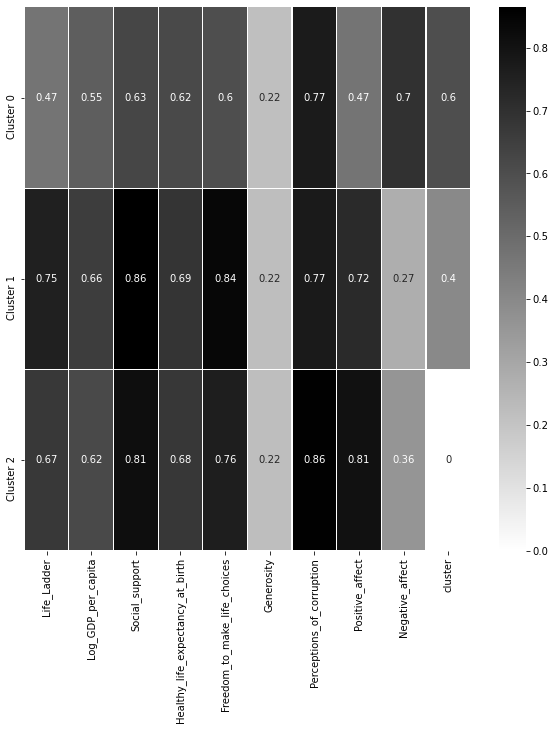

In [81]:
import seaborn as sns

clusters = ['Cluster {}'.format(i) for i in range(3)]
centroids = pd.DataFrame(0.0, index= clusters, columns = xs.columns)

for i, clst in enumerate(clusters) :
    BM = kmeans.labels_ == i
    centroids.loc[clst] = xs[BM].median(axis=0)

plt.figure(figsize=(10,10))
sns.heatmap(centroids, linewidths=0.1, annot=True, cmap='binary')
plt.show()
